2 vars quantitatives

In [2]:
data=read.csv(file.choose(),header=T,sep=",")
attach(data)
data[1:5,]

X,statut,age,expérience.professionnelle,temps.passé.moyen.sur.internet,appareil.préféré.de.consultation,nombre.de.boites.mail,nombre.de.messagerie.consultées.régulièrement,fréquence.de.consultation.de.la.messagerie,nombre.de.mails.reçus.par.jour,...,lecture.de.tous.les.mails,lecture.de.l.objet.expéditeur,nombre.de.mails.non.lus,nombre.de.mails.envoyés.par.semaine,réponse.à.des.mails.nécessitant.une.réponse,consultation.de.mails.en.dehors.des.heures.de.travail.études,personnalisation.de.la.messagerie,importance.de.l.ergonomie,sentiment.envers.de.zéro.inbox,autre.fonctionnalité.de.la.boite.mail
1,3A,23,Expérience > 6 mois,6,Un ordinateur,3,2,< 10,5,...,En grande partie,Oui,0,4,Oui,Oui,Non,Relativement importante,Marquer tout en lu,"Non, j'ai d'autres outils pour ça"
2,Enseignant,34,Ça se compte en années,7,Un ordinateur,3,2,> 10,50,...,Quasiment tous,Oui,5,100,Oui,Oui,Oui,Très importante,Lire tous les mails,"Oui, souvent"
3,1A,20,Entre 1 et 6 mois,4,Un smartphone,5,4,< 3,2,...,Rarement,Oui,0,1,Oui,Non,Non,Relativement importante,Marquer tout en lu,"Non, j'ai d'autres outils pour ça"
4,Autre,26,Expérience > 6 mois,8,Un ordinateur,2,2,> 10,10,...,Rarement,Oui,0,3,Parfois,Non,Oui,Relativement importante,Marquer tout en lu,"Oui, parfois"
6,Enseignant,35,Ça se compte en années,5,Un ordinateur,2,2,> 10,20,...,Rarement,Oui,0,50,Oui,Oui,Non,Relativement importante,Marquer tout en lu,"Non, j'ai d'autres outils pour ça"


################### mails reçus & mails envoyés

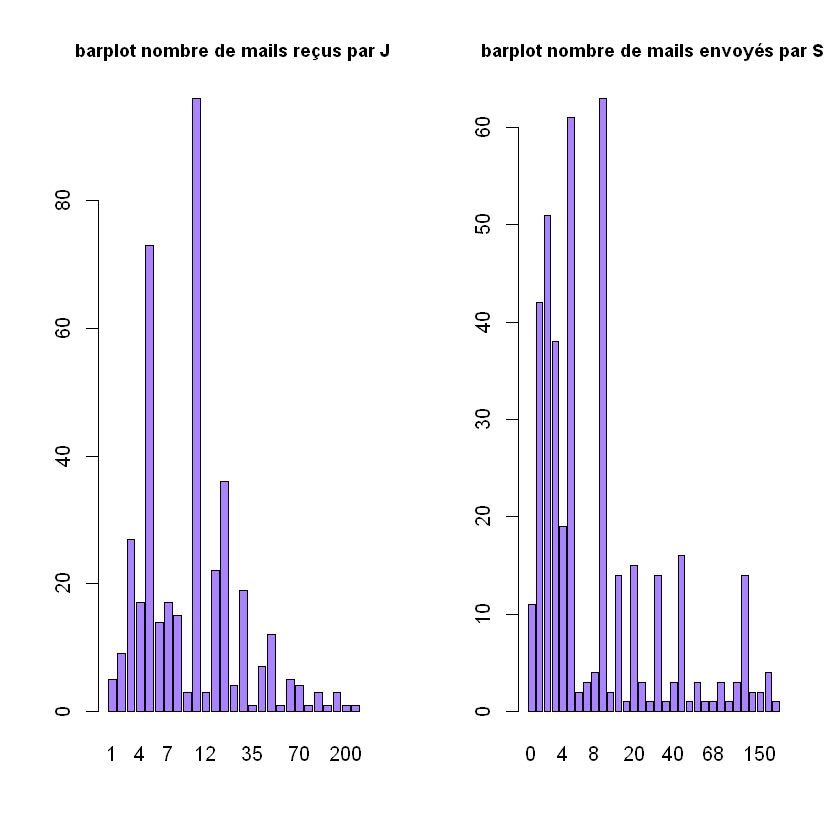

In [49]:
par(mfrow=c(1,2))
barplot(table(nombre.de.mails.reçus.par.jour),main="barplot nombre de mails reçus par J",col="mediumpurple1",font.main=2,cex.main=0.9)
barplot(table(nombre.de.mails.envoyés.par.semaine),main="barplot nombre de mails envoyés par S",col="mediumpurple1",font.main=2,cex.main=0.9)

Aucune ne suit une loi normale, on doit donc utiliser le R de Spearman :

In [5]:
cor.test(nombre.de.mails.reçus.par.jour,nombre.de.mails.envoyés.par.semaine, method="spearman")

Warning message in cor.test.default(nombre.de.mails.reçus.par.jour, nombre.de.mails.envoyés.par.semaine, :
"Cannot compute exact p-value with ties"


	Spearman's rank correlation rho

data:  nombre.de.mails.reçus.par.jour and nombre.de.mails.envoyés.par.semaine
S = 4252600, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
     rho 
0.601317 


p value est significative ==> il y a un existe entre le nombre de mails envoyés et le nombre de mails reçus.

réamlisons une regression:

In [24]:
model=lm(nombre.de.mails.envoyés.par.semaine~nombre.de.mails.reçus.par.jour)
summary(model)



Call:
lm(formula = nombre.de.mails.envoyés.par.semaine ~ nombre.de.mails.reçus.par.jour)

Residuals:
     Min       1Q   Median       3Q      Max 
-178.209  -10.021   -7.328   -1.067  291.664 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     6.63515    1.85293   3.581 0.000385 ***
nombre.de.mails.reçus.par.jour  0.73858    0.06456  11.439  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 30.86 on 398 degrees of freedom
Multiple R-squared:  0.2474,	Adjusted R-squared:  0.2455 
F-statistic: 130.9 on 1 and 398 DF,  p-value: < 2.2e-16


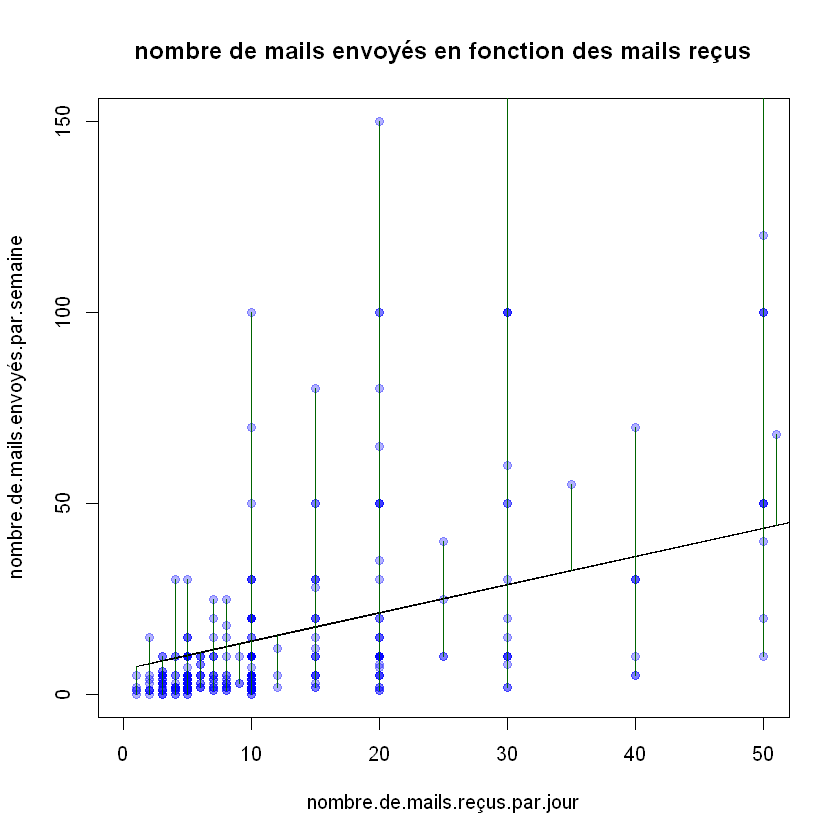

In [48]:
plot(nombre.de.mails.reçus.par.jour,nombre.de.mails.envoyés.par.semaine,xlim=c(0,50),ylim=c(0,150),pch=19, col=rgb(0,0,1,0.3),main="nombre de mails envoyés en fonction des mails reçus")
lines(nombre.de.mails.reçus.par.jour,fitted(model))
segments(nombre.de.mails.reçus.par.jour,fitted(model),nombre.de.mails.reçus.par.jour,nombre.de.mails.envoyés.par.semaine,col="darkgreen")

################# age & nombre de mails envoyés 

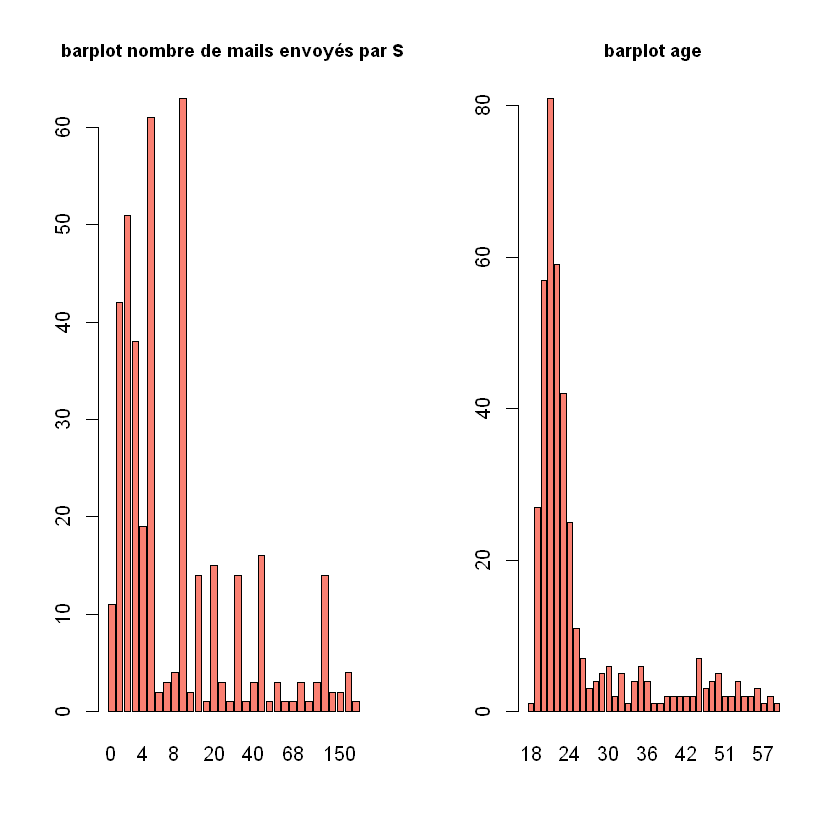

In [47]:
par(mfrow=c(1,2))
barplot(table(nombre.de.mails.envoyés.par.semaine),main="barplot nombre de mails envoyés par S", col="salmon",font.main=2,cex.main=0.9)
barplot(table(age),main="barplot age",col="salmon",font.main=2,cex.main=0.9)


Normalité non respectée ==> test de spearman

In [8]:
cor.test(nombre.de.mails.envoyés.par.semaine,age, method="spearman")

Warning message in cor.test.default(nombre.de.mails.envoyés.par.semaine, age, method = "spearman"):
"Cannot compute exact p-value with ties"


	Spearman's rank correlation rho

data:  nombre.de.mails.envoyés.par.semaine and age
S = 4366800, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
     rho 
0.590614 


p value très petit ==> le nombre de mails envoyés dépend le l'age

###########temps passés sur internet & nb mails non lus

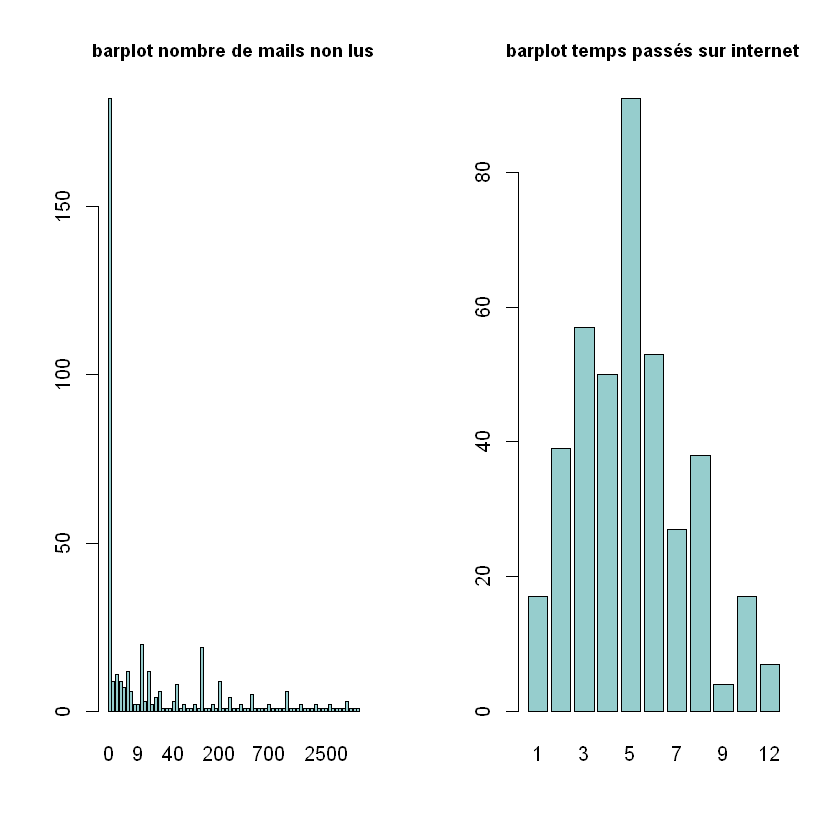

In [45]:
par(mfrow=c(1,2))
barplot(table(nombre.de.mails.non.lus), main="barplot nombre de mails non lus",col = "paleturquoise3",font.main=2,cex.main=0.9)
barplot(table(temps.passé.moyen.sur.internet), main="barplot temps passés sur internet",col = "paleturquoise3",font.main=2,cex.main=0.9)

In [14]:
cor.test(nombre.de.mails.non.lus,temps.passé.moyen.sur.internet,method="spearman")

Warning message in cor.test.default(nombre.de.mails.non.lus, temps.passé.moyen.sur.internet, :
"Cannot compute exact p-value with ties"


	Spearman's rank correlation rho

data:  nombre.de.mails.non.lus and temps.passé.moyen.sur.internet
S = 10715000, p-value = 0.9282
alternative hypothesis: true rho is not equal to 0
sample estimates:
         rho 
-0.004521631 


la p value étant très élevée, il n'existe pas un vrai lien entre les variables